In [1]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [4]:
train_data = '/content/drive/MyDrive/AI/10_MonAn/TRAIN'
test_data =  '/content/drive/MyDrive/AI/10_MonAn/TEST'
val_data  =  '/content/drive/MyDrive/AI/10_MonAn/TEST'

In [5]:
from keras.engine.data_adapter import train_validation_split
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 283 images belonging to 10 classes.
Found 123 images belonging to 10 classes.
Found 123 images belonging to 10 classes.


In [8]:
#ĐẶT NHÃN
class_name = ['Banh mi', 'Banh uot', 'Banh xeo', 'Bun rieu', 'Ca ri', 'Che buoi', 'Com tam', 'Mi xao', 'Pho', 'Thit kho tau']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tong cong co cac loai mon an: ",train_input.num_classes)

labels:  ['Banh mi', 'Banh uot', 'Banh xeo', 'Bun rieu', 'Ca ri', 'Che buoi', 'Com tam', 'Mi xao', 'Pho', 'Thit kho tau']
match class:  {'Bánh Mì': 0, 'Bánh ướt': 1, 'Bánh xèo': 2, 'Bún riêu': 3, 'Cà ri': 4, 'Chè bưởi': 5, 'Cơm tấm': 6, 'Mì xào': 7, 'Phở': 8, 'Thị kho tàu': 9}
Tong cong co cac loai mon an:  10


In [9]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
food_train = model.fit(train_input,batch_size=30,epochs=60,verbose=1,validation_data=val_input)

Epoch 1/60
9/9 [==============================] - 111s 14s/step - loss: 15.8774 - accuracy: 0.0883 - val_loss: 2.2907 - val_accuracy: 0.1301
Epoch 2/60
9/9 [==============================] - 12s 1s/step - loss: 2.3234 - accuracy: 0.1272 - val_loss: 2.3026 - val_accuracy: 0.1057
Epoch 3/60
9/9 [==============================] - 12s 1s/step - loss: 2.3013 - accuracy: 0.1343 - val_loss: 2.3030 - val_accuracy: 0.1057
Epoch 4/60
9/9 [==============================] - 12s 1s/step - loss: 2.2922 - accuracy: 0.0954 - val_loss: 2.2660 - val_accuracy: 0.1057
Epoch 5/60
9/9 [==============================] - 12s 1s/step - loss: 2.2262 - accuracy: 0.1131 - val_loss: 2.2245 - val_accuracy: 0.1301
Epoch 6/60
9/9 [==============================] - 12s 1s/step - loss: 2.1289 - accuracy: 0.1802 - val_loss: 2.0861 - val_accuracy: 0.3089
Epoch 7/60
9/9 [==============================] - 12s 1s/step - loss: 1.9847 - accuracy: 0.2792 - val_loss: 2.0367 - val_accuracy: 0.3089
Epoch 8/60
9/9 [===============

In [14]:
model.save('/content/drive/MyDrive/AI/10_MonAn/Food.h5')

array([8])

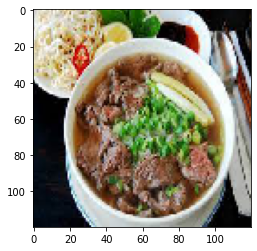

In [19]:
pic = image.load_img('/content/drive/MyDrive/AI/10_MonAn/Pho.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [20]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("mon an: Banh mi")
if guess[0]==1:
  print("mon an: Banh uot")
if guess[0]==2:
  print("mon an: Banh xeo")
if guess[0]==3:
  print("mon an: Banh uot")
if guess[0]==4:
  print("mon an: Ca ri")
if guess[0]==5:
  print("mon an: Che buoi")
if guess[0]==6:
  print("mon an: Com tam")
if guess[0]==7:
  print("mon an: Mi xao")
if guess[0]==8:
  print("mon an: Pho")
if guess[0]==9:
  print("mon an: Thit kho tau")

mon an: Pho
